In [9]:
import networkx as nx
import EoN
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [14]:
# Simulating SIR Model
N = 1000
m = 2
G = nx.barabasi_albert_graph(N, m)


In [15]:
mu = 0.1
initial_fraction_infected = 0.01
initial_infecteds = np.random.choice(G.nodes(), size=int(N*initial_fraction_infected), replace=False)

# Run the simulation
def run_sir(beta_value):
    t, S, I, R = EoN.fast_SIR(G, tau=beta_value, gamma=mu, initial_infecteds=initial_infecteds,  tmax=100)
    S_fractions = np.array(S) / N   
    I_fractions = np.array(I) / N
    R_fractions = np.array(R) / N
    return t, S_fractions, I_fractions, R_fractions

# High spreading rate
beta_high = 0.5
t_high, S_high, I_high, R_high = run_sir(beta_high)

# Low spreading rate
beta_low = 0.05
t_low, S_low, I_low, R_low = run_sir(beta_low)

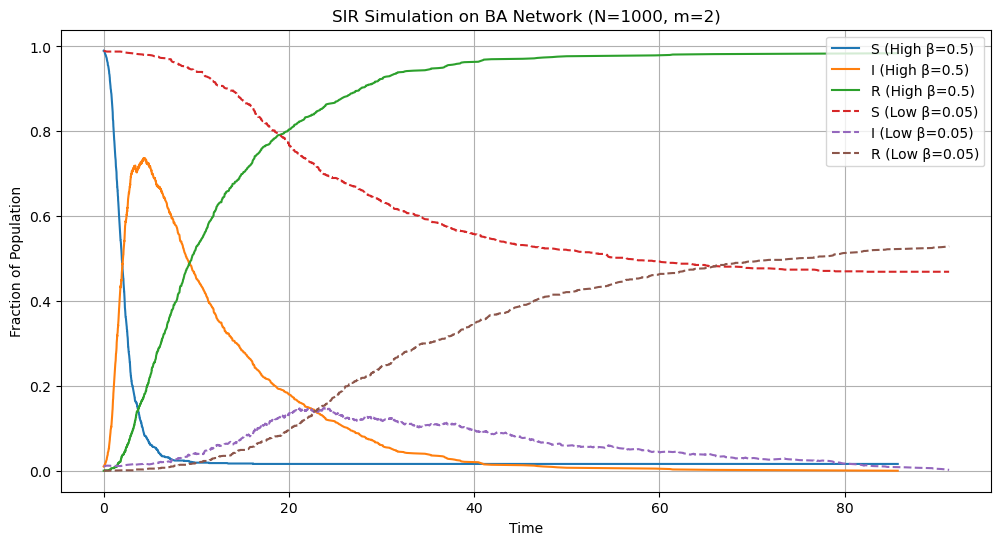

In [16]:
plt.figure(figsize=(12, 6))

# High spreading lines
plt.plot(t_high, S_high, label="S (High β=0.5)")
plt.plot(t_high, I_high, label="I (High β=0.5)")
plt.plot(t_high, R_high, label="R (High β=0.5)")

# Low spreading lines (dashed)
plt.plot(t_low, S_low, '--', label="S (Low β=0.05)")
plt.plot(t_low, I_low, '--', label="I (Low β=0.05)")
plt.plot(t_low, R_low, '--', label="R (Low β=0.05)")

plt.xlabel("Time")
plt.ylabel("Fraction of Population")
plt.title("SIR Simulation on BA Network (N=1000, m=2)")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Calculate the epidemic threshold
degrees = np.array([deg for node, deg in G.degree()])
k_avg = degrees.mean()
k_sq_avg = np.mean(degrees**2)
lambda_c = k_avg / (k_sq_avg - k_avg)
print(f"Epidemic threshold (λc): {lambda_c:.4f}")


Epidemic threshold (λc): 0.1101


In [20]:
print("Average degree <k>:", k_avg)
print("Second moment <k^2>:", k_sq_avg)

Average degree <k>: 3.992
Second moment <k^2>: 40.25


In [18]:
# Calculate effective spreading rates
lambda_high = beta_high / mu
lambda_low = beta_low / mu

print(f"Effective spreading rate (λ_high): {lambda_high:.4f}")
print(f"Effective spreading rate (λ_low): {lambda_low:.4f}")


Effective spreading rate (λ_high): 5.0000
Effective spreading rate (λ_low): 0.5000


In [19]:
# Percolation and Network Robustness
N=1000
m=2
G=nx.barabasi_albert_graph(N,m)

# Identify the top 10% of nodes by Degree Centrality
num_removed = int(N * 0.1)
sorted_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)
hubs_to_remove = [node for node, _ in sorted_nodes[:num_removed]]

components = nx.connected_components(G)
original_gc_size = len(max(components, key=len)) if components else 0

# Perform Targeted Attack
G_copy = G.copy()
G_copy.remove_nodes_from(hubs_to_remove)

new_gc_size = len(max(nx.connected_components(G_copy), key=len)) if nx.connected_components(G_copy) else 0

print(f"Original Giant Component Size (GC_orig): {original_gc_size}")
print(f"New Giant Component Size (GC_new): {new_gc_size}")
print("Percentage drop:", 100 * (original_gc_size - new_gc_size) / original_gc_size, "%")

Original Giant Component Size (GC_orig): 1000
New Giant Component Size (GC_new): 616
Percentage drop: 38.4 %
